In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from helpers.qec_helpers import *
from helpers.gates import *
from helpers.steane_helpers import *
from helpers.errors import *
from helpers.fault_tolerance import *

# Modelling and simulating noisy quantum computers

## Depolarizing Channel:
### Simulates bit and phase flips due to gate infidelities with in the circuit (probability $p_1$)
$$ K_{D_0} = \sqrt{1-p_1}, \quad K_{D_1} = \sqrt{\frac{p_1}{3}}X, \quad K_{D_2} = \sqrt{\frac{p_1}{3}}Z, \quad K_{D_3} = \sqrt{\frac{p_1}{3}}Y$$
$$ \rho \mapsto D(\rho) = \sum_{i = 0}^{3}K_{D_i}\rho K^\dagger_{D_i}$$


<u>Single qubit gate model:</u> error after single qubit gate according to single qubit error rates

This example will show a hadamard gate but all other single qubit gate operations will work similarly.

In [17]:
psi = np.array([1, 0]) # initial state of our qubit
rho = np.kron(psi, psi[np.newaxis].conj().T) # convert to density matrix
p_1 = 0.0001 # probability of gate error
rho_prime = np.dot(sigma_x, np.dot(rho, sigma_x.conj().T)) # apply 'perfect gate'

final_rho = qubit_gate_error_matrix(rho_prime, p_1, 0, 1) # apply errored gate operation
print('Density Matrix after errored gate operation: \n', final_rho)

Density Matrix after errored gate operation: 
 [[6.66666667e-05+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.99933333e-01+0.j]]


total probabilities:  1.0


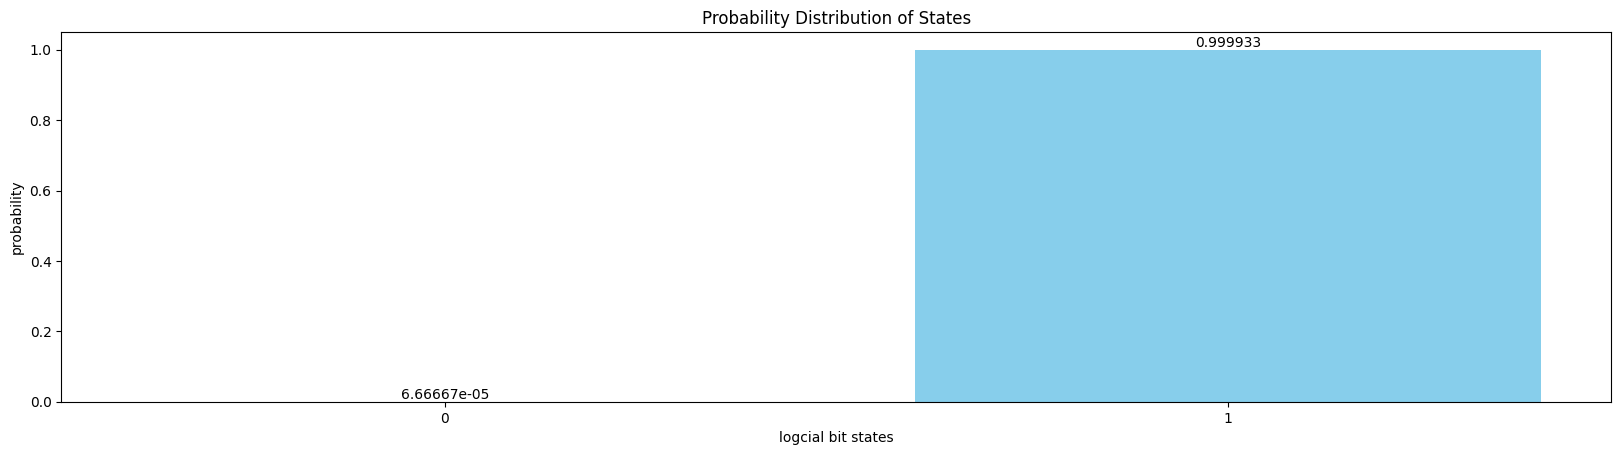

In [18]:
# probability of the state measurments from the density matrix are defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(final_rho)):
    prob_sum += np.abs(final_rho[i,i])
    state_probs = np.append(state_probs, final_rho[i,i])
    
print('total probabilities: ', prob_sum)

bits = vector_state_to_bit_state(state_probs, 1)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs, label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

<u> Two qubit gate model:</u> Error occurs after a two qubit gate according to two qubit error rates


This example will use a CNOT matrix between 2 qubits in a 3 qubit system. We will first show all-to-all connectivity and then restrict to line to line (after that grid will work similarly to both of these)

In [5]:
# In both examples we will use the following information #
zero = np.array([1, 0])
one = np.array([0, 1])
psi = np.kron(one, np.kron(zero, one)) # set an initial_state
rho = np.kron(psi, psi[np.newaxis].conj().T) # find the density matrix

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.001
p_q2 = 0.00001

error_probs = np.array([p_q0, p_q1, p_q2])

total probability:  1.0


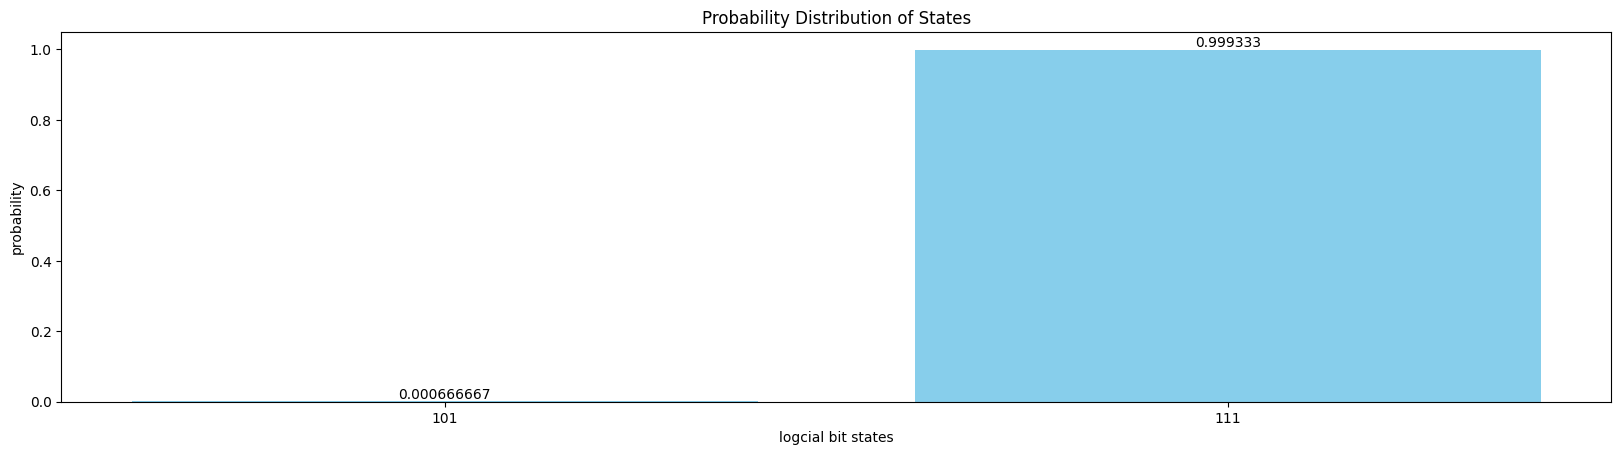

In [15]:
# 2 adjacent qubits all-to-all connectivity CNOT gate example #
cnot_gate = CNOT(0, 1, 3) # CNOT gate with q0 as control and q1 as target

rho_prime = np.dot(cnot_gate, np.dot(rho, cnot_gate.conj().T)) # apply our 'perfect' cnot gate

final_rho = qubit_gate_error_matrix(rho_prime, p_q1, 1, 3) # apply our error gate

# probability of the state measurments from the density matrix are defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(final_rho)):
    prob_sum += np.abs(final_rho[i,i])
    state_probs = np.append(state_probs, final_rho[i,i])
    
print('total probability: ', prob_sum)

bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

total probabilities:  1.0


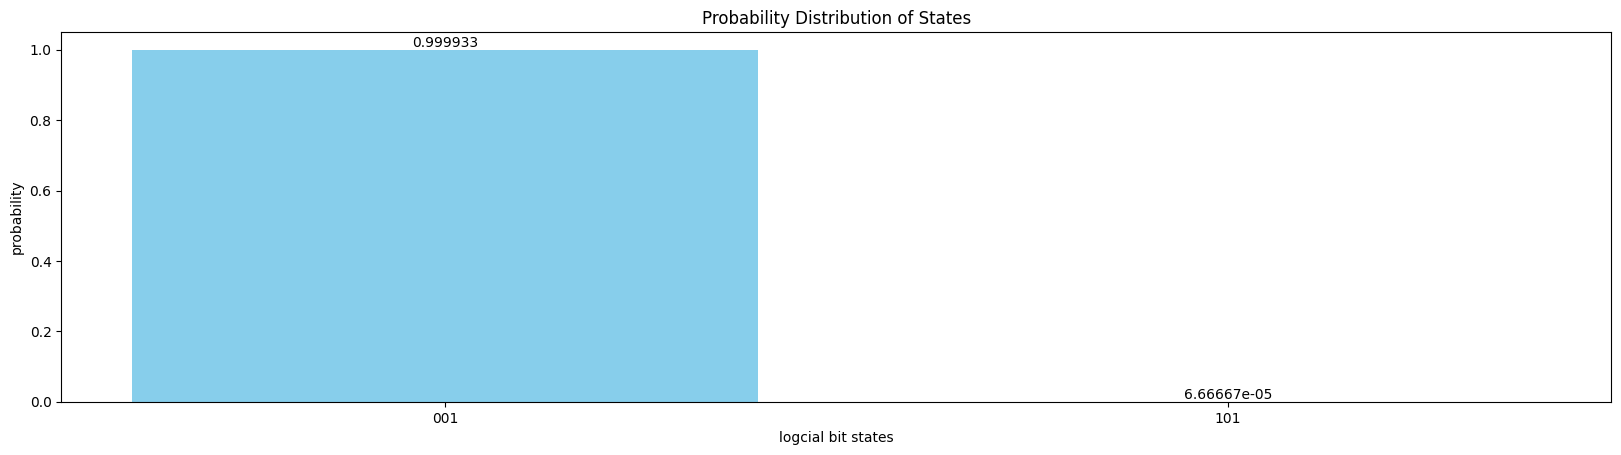

In [14]:
# 2 non-adjacent qubits all-to-all connectivity CNOT gate example #
cnot_gate = CNOT(2, 0, 3) # CNOT gate with q2 as control and q0 as target

rho_prime = np.dot(cnot_gate, np.dot(rho, cnot_gate.conj().T)) # apply our cnot gate

final_rho = qubit_gate_error_matrix(rho_prime, p_q0, 0, 3) # apply our error gate

# probability of the state measurments from the density matrix are defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(final_rho)):
    prob_sum += np.abs(final_rho[i,i])
    state_probs = np.append(state_probs, final_rho[i,i])
    
print('total probabilities: ', prob_sum)

bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

Now focussing on <u>line connectivity</u>. We will use our current CNOT functions to create new ones that implement the errors that occur after each gate is applied in the derivations.

total probability:  1.0000000000000004


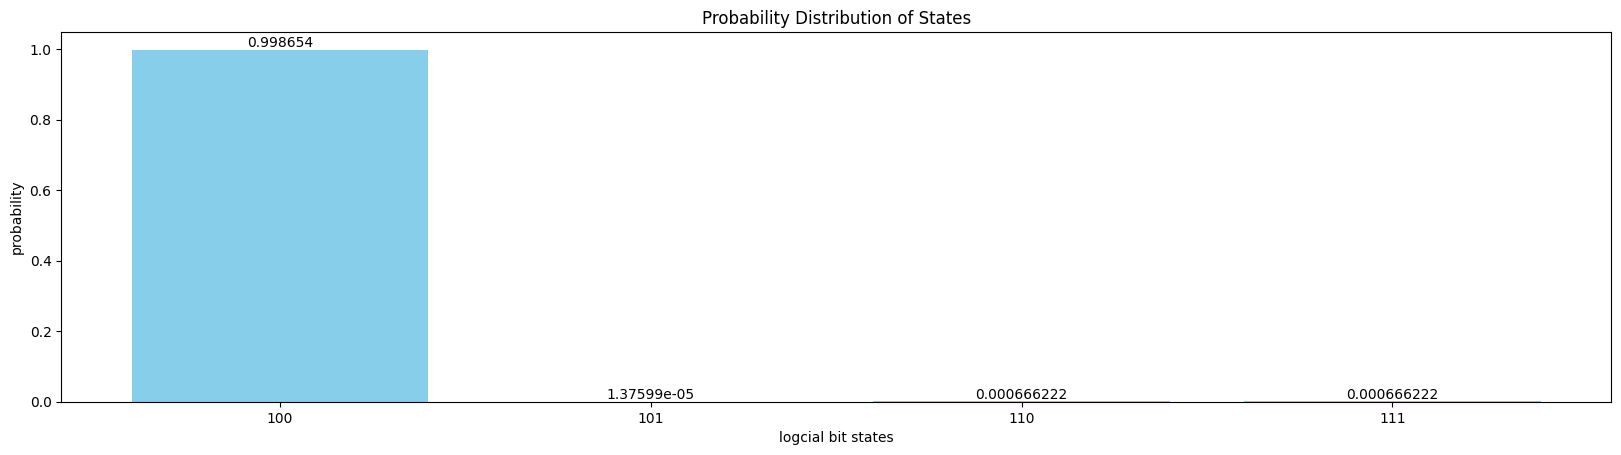

In [12]:
# 2 non-adjacent qubits line connectivity CNOT gate example #
# CNOT gate with q0 as control and q2 as target
psi = np.kron(one, np.kron(zero, one))

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.001
p_q2 = 0.00001

# define your error probability for each qubit
qubit_error_probs = np.array([p_q0, p_q1, p_q2])

# apply an errored line connected CNOT gate
rho_prime = line_errored_CNOT(psi, 0, 2, qubit_error_probs, form = 'psi') 

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(rho_prime)):
    prob_sum += np.abs(rho_prime[i,i])
    state_probs = np.append(state_probs, rho_prime[i,i])
    
print('total probability: ', prob_sum)
bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

total probability:  1.0000000000000007


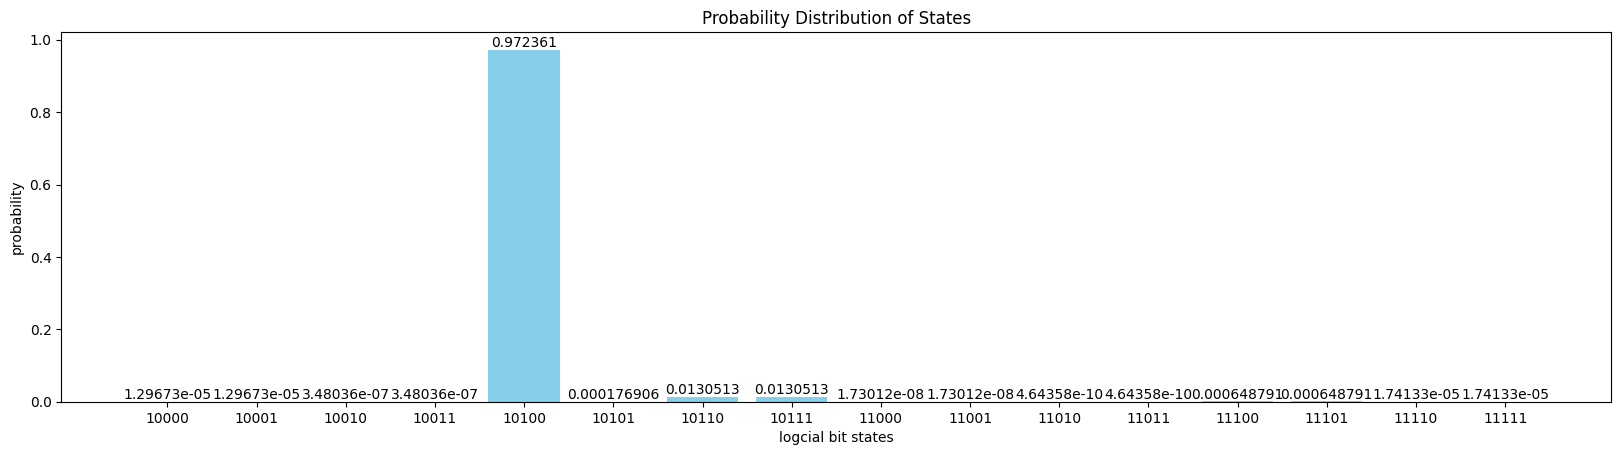

In [13]:
# 2 non-adjacent qubits line connectivity CNOT gate example with 5 qubits #
# CNOT gate with q0 as control and q2 as target
psi = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, one))))

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.001
p_q2 = 0.00001
p_q3 = 0.01
p_q4 = 0.000001

# define your error probability for each qubit
qubit_error_probs = np.array([p_q0, p_q1, p_q2, p_q3, p_q4])

# apply an errored line connected CNOT gate
rho_prime = line_errored_CNOT(psi, 0, 4, qubit_error_probs, form = 'psi')

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(rho_prime)):
    prob_sum += np.abs(rho_prime[i,i])
    state_probs = np.append(state_probs, rho_prime[i,i])
    
print('total probability: ', prob_sum)
bits = vector_state_to_bit_state(state_probs, 5)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

## State Preparation and Measuremnt:

## Thermal Decoherence and Dephasing Channel: